In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [13]:
#Membaca dataset kendaraan_train menggunakan library pandas
data = pd.read_csv("kendaraan_train.csv")
data
#Beberapa atribut diantaranya terdapat data yang terdapat "NaN" / missing value

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


Data Cleansing

In [14]:
#jumlah data yang kosong pada setiap kolom
data.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [15]:
#Function .info() adalah untuk mengetahui gambaran data yang lebih spesifik.
#outputnya adalah kolom beserta data type-nya.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [16]:
#MEAN IMPUTATION
#Untuk data numerik(dtype: int64) menggunakan teknik MEAN IMPUTATION
data['id'] = data['id'].fillna(data['id'].mean())
data['Tertarik'] = data['Tertarik'].fillna(data['Tertarik'].mean())

In [17]:
#DELETE MISSING VALUE
#Untuk data kategorikal(dtype : object, float64) menggunakan teknik DELETE MISSING VALUE
data = data[data["Jenis_Kelamin"].notna()]
data = data[data["Umur"].notna()]
data = data[data["SIM"].notna()]
data = data[data["Kode_Daerah"].notna()]
data = data[data["Sudah_Asuransi"].notna()]
data = data[data["Umur_Kendaraan"].notna()]
data = data[data["Kendaraan_Rusak"].notna()]
data = data[data["Premi"].notna()]
data = data[data["Kanal_Penjualan"].notna()]
data = data[data["Lama_Berlangganan"].notna()]
data = data[data["Tertarik"].notna()]

In [18]:
#untuk mengecek masih ada missing value atau tidak.
data.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [19]:
data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [20]:
#Encode data menggunakan library dari LabelEncoder
#mengubah kategorikal menjadi numerik
#jenis kelamin : 1. wanita 0. pria
#Kendaraan rusak: 1. tidak 0. pernah
#Umur kendaraan: 1. <1 Tahun 2. >2 Tahun 0. 1-2 Tahun
encoder = LabelEncoder()
data['Jenis_Kelamin'] = encoder.fit_transform(data['Jenis_Kelamin'])
data['Kendaraan_Rusak'] = encoder.fit_transform(data['Kendaraan_Rusak'])
data['Umur_Kendaraan'] = encoder.fit_transform(data['Umur_Kendaraan'])


data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,4,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,6,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
8,9,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,1,23.0,1.0,4.0,1.0,1,1,25988.0,152.0,217.0,0
285827,285828,1,21.0,1.0,46.0,1.0,1,1,44686.0,152.0,50.0,0
285828,285829,1,23.0,1.0,50.0,1.0,1,1,49751.0,152.0,226.0,0
285829,285830,0,68.0,1.0,7.0,1.0,0,1,30503.0,124.0,270.0,0


In [21]:
# clustering berdasarkan kode daerah dan kanal penjualan
Kanal_Penjualan = data["Kanal_Penjualan"].values
Lama_Berlangganan = data["Lama_Berlangganan"].values
points = np.array([Kanal_Penjualan, Lama_Berlangganan]).T

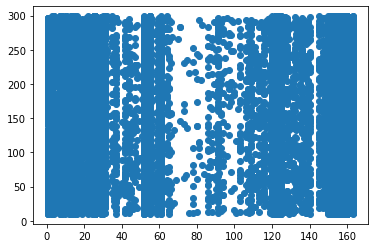

In [22]:
# visualisasi
plt.scatter(Kanal_Penjualan, Lama_Berlangganan)
plt.show()

In [23]:
# buat fungsi penghitung jarak 2 titik
def distance(x, y):
    return np.linalg.norm(x-y)

In [24]:
# buat fungsi mencari jarak terdekat
def terdekat(point, centeroids):
    terkecil = distance(point, centeroids[0])
    idx = 0
    for i in range(1, len(centeroids)):
        j = distance(point, centeroids[i])
        if j < terkecil:
            terkecil = j
            idx = i
    return idx

In [25]:
# fungsi kmeans
def kmeans(points, centeroids, k, iterasi):
    for i in range(iterasi):
        # buat sum
        sum = [[] for x in range(k)]
        for p in points:
            idx = terdekat(p, centeroids)
            sum[idx].append(p)
        # cari rata2 nya, lalu update centeroids
        for j in range(k):
            if(len(sum[j]) > 0):
                mean = np.mean(sum[j])
                centeroids[j] = mean
    return centeroids

In [26]:
# fungsi untuk membuat centeroid
def generate_centeroid(k):
    centeroid_kp = np.random.uniform(np.min(Kanal_Penjualan), np.max(Kanal_Penjualan), k)
    centeroid_lb = np.random.uniform(np.min(Lama_Berlangganan), np.max(Lama_Berlangganan), k)
    return np.array([centeroid_kp, centeroid_lb]).T

In [27]:
# fungsi untuk memvisualisasikan hasil cluster
def visualize(points, centeroids, k):
    groups = [[] for x in range(k)]
    for p in points:
        idx = terdekat(p, centeroids)
        groups[idx].append(p)
    groups = np.array(groups)
    colors = ['blue', 'red', 'green', 'yellow', 'pink']
    for i in range(k):
        group = groups[i]
        group = np.array(group)
        if(group.shape[0] > 0):
            plt.scatter(group.T[0], group.T[1], color=colors[i])
    plt.show()

In [28]:
# inisialisasi k
k = 2
# inisialisasi centeroid
centeroids = generate_centeroid(k)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


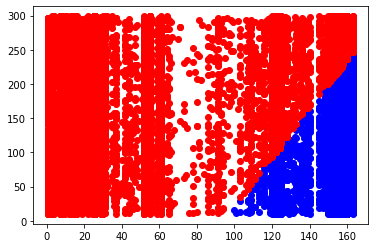

In [29]:
# visualisasikan sebelum di cluster
visualize(points, centeroids, k)

In [30]:
# Melakukan clustering
centeroids = kmeans(points, centeroids, k, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


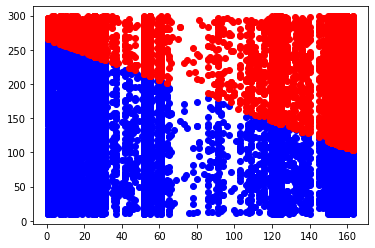

In [31]:
# visualisasi data setelah di cluster
visualize(points, centeroids, k)

In [32]:
# ganti nilai k
k = 5
centeroids = generate_centeroid(k)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


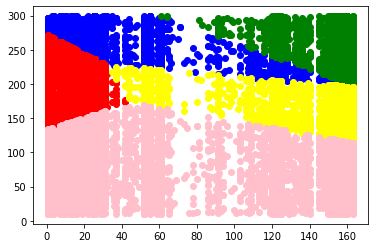

In [33]:
# visualisasi data sebelum di cluster
visualize(points, centeroids, k)  

In [34]:
# Melakukan clustering
centeroids = kmeans(points, centeroids, k, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


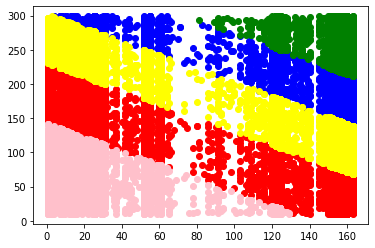

In [35]:
# visualisasi data setelah di cluster
visualize(points, centeroids, k)

Kesimpulan
•	Merupakan algoritma yang sederhana dan umum digunakan.
•	Mempunyai waktu komputasi yang cepat dan efisien.
•	Dataset yang digunakan harus data yang numerik.
